In [15]:
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold

# Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
from imblearn.over_sampling import SMOTE

# Î™®Îç∏ ÌèâÍ∞Ä
from sklearn.metrics import roc_auc_score

# Îî•Îü¨Îãù Î™®Îç∏ (TensorFlow)
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [16]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

# "UID" Ïª¨Îüº Ïú†ÏßÄ (Ï†úÏ∂ú ÌååÏùºÏö©)
test_uid = test_df[["UID"]]

# "UID" Ïª¨Îüº ÏÇ≠Ï†ú
train_df.drop(columns=["UID"], inplace=True)
test_df.drop(columns=["UID"], inplace=True)

# X, y Î∂ÑÎ¶¨
X = train_df.drop(columns=["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"])
y = train_df["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"]

In [17]:
categorical_cols = ["Ï£ºÍ±∞ ÌòïÌÉú", "ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"]

# ÎùºÎ≤® Ïù∏ÏΩîÎî© (ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò)
label_enc = LabelEncoder()
X["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"] = label_enc.fit_transform(X["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"])
test_df["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"] = label_enc.transform(test_df["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"])

# Ïõê-Ìï´ Ïù∏ÏΩîÎî© Ï†ÅÏö©
X = pd.get_dummies(X, columns=["Ï£ºÍ±∞ ÌòïÌÉú", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Ï£ºÍ±∞ ÌòïÌÉú", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"], drop_first=True)

In [18]:
# Î°úÍ∑∏ Î≥ÄÌôò
log_columns = ["ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°", "Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°", "ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°"]
for col in log_columns:
    X[col] = np.log1p(X[col])
    test_df[col] = np.log1p(test_df[col])

# "ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"Í∞Ä 0Ïù¥Î©¥ "Ïó∞Ï≤¥ ÏóÜÏùå" Ïª¨Îüº Ï∂îÍ∞Ä
X["Ïó∞Ï≤¥ ÏóÜÏùå"] = (X["ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"] == 0).astype(int)
test_df["Ïó∞Ï≤¥ ÏóÜÏùå"] = (test_df["ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"] == 0).astype(int)

In [19]:
#Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
test_imputed = imputer.transform(test_df)

In [20]:
#Îç∞Ïù¥ÌÑ∞ scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
test_scaled = scaler.transform(test_imputed)

In [21]:
#Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

# FoldÎ≥Ñ AccuracyÏôÄ Loss Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
all_history = []
roc_auc_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

for train_index, valid_index in kf.split(X_resampled):
    print(f"üîÑ Fold {fold} ÏãúÏûë")

    # ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    X_train_fold, X_valid_fold = X_resampled[train_index], X_resampled[valid_index]
    y_train_fold, y_valid_fold = y_resampled[train_index], y_resampled[valid_index]

    # Î™®Îç∏ Ï†ïÏùò (BN Ï∂îÍ∞Ä & ÏµúÏ†ÅÌôîÎêú Íµ¨Ï°∞)
    model = keras.Sequential([
        Dense(64),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),  # Dropout ÎπÑÏú® Ï°∞Ï†ï

        Dense(32),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),

        Dense(1, activation="sigmoid")
    ])

    # Adam ÏòµÌã∞ÎßàÏù¥Ï†Ä & ÌïôÏäµÎ•† Ï¥àÍ∏∞Í∞í ÏÑ§Ï†ï
    optimizer = Adam(learning_rate=5e-5)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # ÌïôÏäµÎ•† Í∞êÏÜå ÏΩúÎ∞± Ï∂îÍ∞Ä
    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,  # ÌïôÏäµÎ•†ÏùÑ Ï†àÎ∞òÏúºÎ°ú Ï§ÑÏûÑ
        patience=5,  # 5 epoch ÎèôÏïà Í∞úÏÑ† ÏóÜÏúºÎ©¥ Í∞êÏÜå
        min_lr=1e-6,  # ÏµúÏÜå ÌïôÏäµÎ•† ÏÑ§Ï†ï (ÎÑàÎ¨¥ ÏûëÏïÑÏßÄÎäî Í≤É Î∞©ÏßÄ)
        verbose=1
    )

    # Ï°∞Í∏∞ Ï¢ÖÎ£å ÏΩúÎ∞± ÏÑ§Ï†ï
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        min_delta=5e-5,
        restore_best_weights=True
    )

    # Î™®Îç∏ ÌïôÏäµ
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_valid_fold, y_valid_fold),
        epochs=100,
        batch_size=64,
        callbacks=[early_stopping, reduce_lr],  # ÌïôÏäµÎ•† Ï°∞Ï†ï ÏΩúÎ∞± Ï∂îÍ∞Ä
        verbose=1
    )

    # FoldÏùò ÌïôÏäµ Í≤∞Í≥º Ï†ÄÏû•
    all_history.append(history.history)

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
    y_valid_pred = model.predict(X_valid_fold).flatten()
    y_valid_pred = np.clip(y_valid_pred, 1e-7, 1 - 1e-7)  # Í∞í ÏïàÏ†ïÌôî

    roc_auc = roc_auc_score(y_valid_fold, y_valid_pred)
    print(f"‚úÖ Fold {fold} Validation ROC-AUC: {roc_auc:.4f}")
    roc_auc_scores.append(roc_auc)

    fold += 1

# ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† ROC-AUC: {np.mean(roc_auc_scores):.4f}")

üîÑ Fold 1 ÏãúÏûë
Epoch 1/100
165/165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 5ms/step - accuracy: 0.4702 - loss: 0.9211 - val_accuracy: 0.4898 - val_loss: 0.8116 - learning_rate: 5.0000e-05
Epoch 2/100
165/165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.4943 - loss: 0.8649 - val_accuracy: 0.5080 - val_loss: 0.7560 - learning_rate: 5.0000e-05
Epoch 3/100
165/165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.5097 - loss: 0.8200 - val_accuracy: 0.5451 - val_loss: 0.7162 - learning_rate: 5.0000e-05
Epoch 4/100
165/165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.5294 - loss: 0.7708 - val_accuracy: 0.5895 - val_loss: 0.6869 - learning_rate: 5.0000e-05
Epoch 5/100
165/165 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 0.5460 - loss: 0.7451 - val_accuracy: 0.6161 - val_loss: 0.6664 - learning_rate: 5.0000e

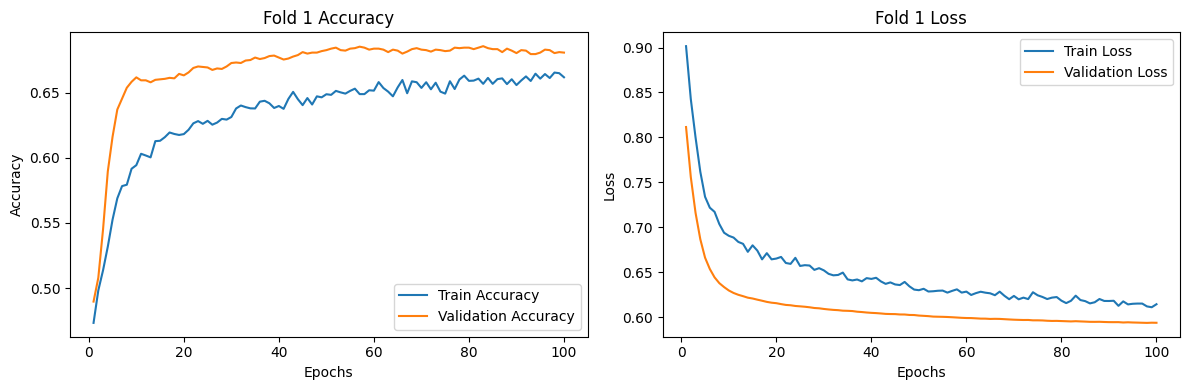

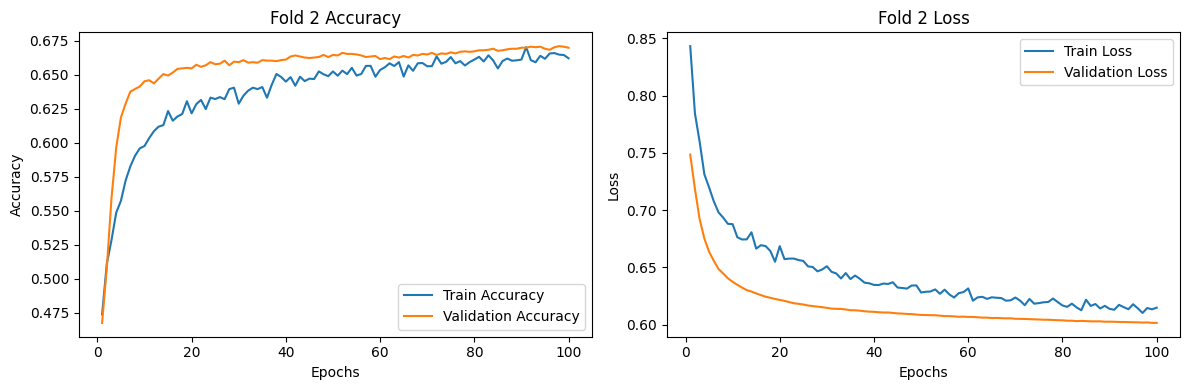

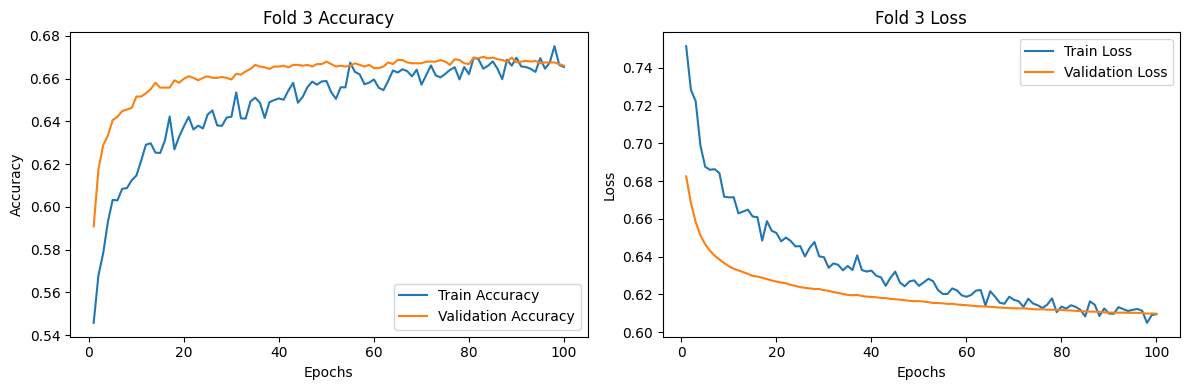

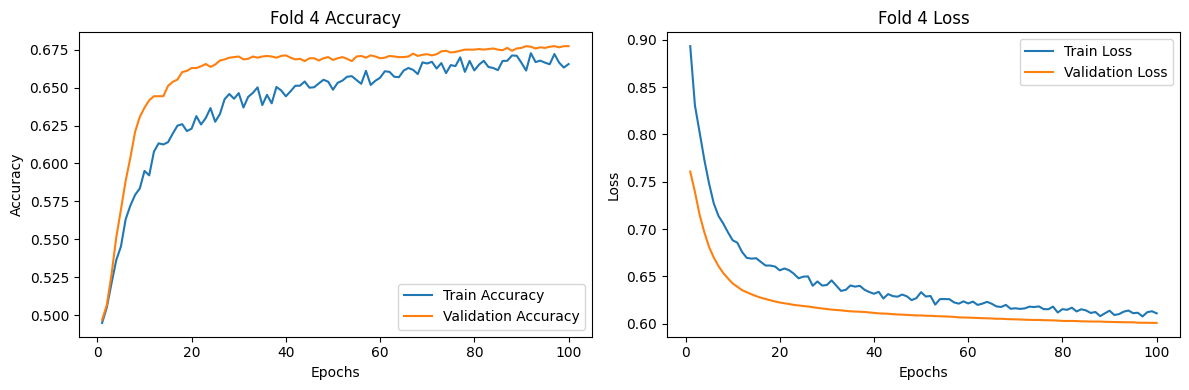

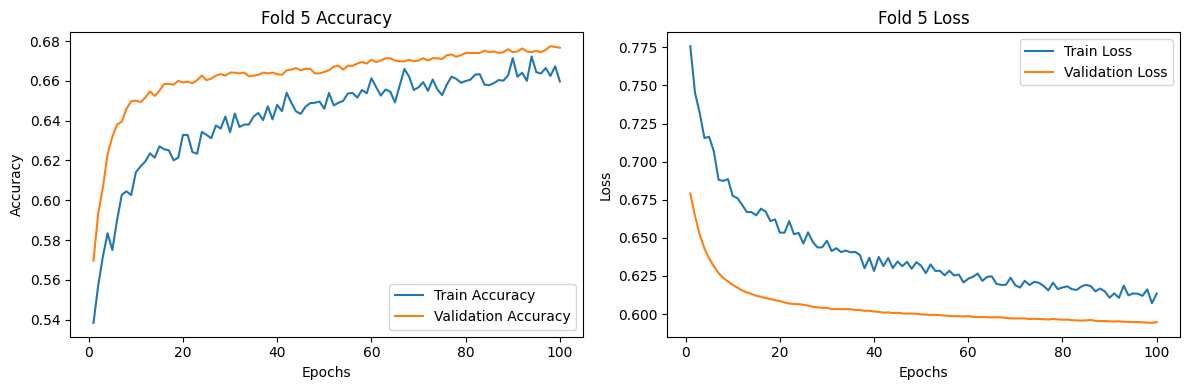

In [31]:
# ÏãúÍ∞ÅÌôî: FoldÎ≥Ñ AccuracyÏôÄ Loss
for i, history in enumerate(all_history):
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 4))

    # Accuracy ÏãúÍ∞ÅÌôî
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['accuracy'], label='Train Accuracy')
    plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i + 1} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss ÏãúÍ∞ÅÌôî
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i + 1} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [32]:
y_test_pred = model.predict(test_scaled).flatten()  # ÌôïÎ•† Í∞í Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

preds_series = pd.Series(y_test_pred)
print(preds_series.head())

# Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = pd.DataFrame({
    "UID": test_uid["UID"],
    "Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ ÌôïÎ•†": y_test_pred  # ÌôïÎ•†Í∞íÏùÑ Í∑∏ÎåÄÎ°ú Ï†ÄÏû•
})

# CSV Ï†ÄÏû•
submission.to_csv(r'g:\f_obligation\f_obligation_18_DL.csv', index=False)

65/65 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step
0    0.534935
1    0.409083
2    0.430543
3    0.309992
4    0.481108
dtype: float32
